In [3]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


algorithm = 'ComplementNB'
acc = '76'
dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'


In [16]:


n_gram = (1, 2)
vectorizer_path = f"./vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"
model_path = f"./models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"
df = pd.read_csv(f'./data/war2.csv', delimiter=',')
df = df.drop_duplicates()
df = df[['tweet', 'sentiment']]


In [17]:

tfidf = joblib.load(vectorizer_path)
model = joblib.load(model_path)


In [18]:

X = df.tweet.fillna(' ')
X

0       @afp how sad is life. when family have to flee...
1       latest news about the russia ukraine crisis: m...
2       @kyivindependent 3 weeks ago. we tweeted. the ...
3       trouble in belarus. #ukraine has released deta...
4       the intellectual catastrophe of putin -  the m...
                              ...                        
5352    @dragonwong2024 russia, get out of ukraine, or...
5353    @vanessabeeley @craigmurrayorg @swagmanlawyer ...
5354    #russian president vladimir putin on events in...
5355    comparing the result of the  conflict of ukrai...
5356    at the end of the day,putin's victory in the w...
Name: tweet, Length: 5328, dtype: object

In [22]:
X[4]

'the intellectual catastrophe of putin -  the meaning of russia’s war in ukraine is its own national weakness.  https://t.co/b4oirakqd2'

In [23]:

tweets = X
num_of_tweets_analyzed = len(tweets)
y_pred = tfidf.transform(X)
y_pred

<5328x402749 sparse matrix of type '<class 'numpy.float64'>'
	with 69931 stored elements in Compressed Sparse Row format>

In [29]:

predictions = model.predict(y_pred)
len(np.where(predictions==0)[0]), len(np.where(predictions==1)[0])

(1360, 3968)

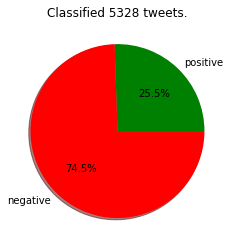

In [33]:

# saving tweets to csv
tweets.to_csv(f'./analysis/tweets-war2.csv')
# saving sentiment predictions to csv
np.savetxt(f'./analysis/predictions-war2.csv',
        predictions, delimiter=',', fmt=('%s'))
# adding sentiment column to the beginning
df = pd.read_csv(
    f'./analysis/predictions-war2.csv', header=None)
df.rename(columns={0: 'sentiment'}, inplace=True)
# save to new csv file
df.to_csv(
    f'./analysis/predictions-war2.csv', index=False)
# merging tweets and predictions
filenames = [f'./analysis/tweets-war2.csv',
             f'./analysis/predictions-war2.csv']
dfs = []
for filename in filenames:
    # read the csv, making sure the first two columns are str
    df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
    # change the column names so they won't collide during concatenation
    df.columns = [filename + str(cname) for cname in df.columns]
    dfs.append(df)
# concatenate them horizontally
merged = pd.concat(dfs, axis=1)
# write it out
merged.to_csv(
    f"./analysis/merged-war2.csv", header=None, index=None)
df = pd.read_csv(f'./analysis/merged-war2.csv')
labels = ['negative', 'positive']
title_type = df.groupby('sentiment').agg('count')
type_labels = ['positive', 'negative']
type_counts = title_type.tweet.sort_values()
colors = ['g', 'r']
plt.subplot(
    aspect=1, title=f'Classified {num_of_tweets_analyzed} tweets.')
type_show_ids = plt.pie(type_counts, labels=type_labels,
                        autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig(f"./visuals/war2.png")
plt.show()
